**Permitting google Colab to access the dataset which is present in my google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# AdaBoost

Let us implement the AdaBoost algorithm, to build a powerful emsemble classifier from a set of weaker classifiers. Our base classifier will be a decision stump.

The training algorithm we will implement is as follows. We have $N$ training datapoints and are creating an ensemble of $k$ classifiers.

- Initialize the weights for all datapoints ($w_j = 1/N$ for $j=1,2,...N$)
- For $i = 1$ to $k$
    - Form training set $D_i$ by sampling $N$ tuples (with replacement) from the full training dataset. The sampling probability for a tuple $(x_j,y_j)$ should be given by its corresponding weight $w_j$.
    - Use dataset $D_i$ to fit a decision stump $M_i$. You can use sklearn's DecisionTreeClassifier with max_depth=1 to fit a decision stump.
    - Calculate the error rate for $M_i$ using the sum of the weights of the misclassified points.
    $$err(M_i) = \sum_{j=1}^N w_j * \mathbb{1}\{y_j \ne M_i(x_j)\}$$
    - The weight of classifier $M_i$'s vote is computed as $\alpha_i = 0.5*\log(\frac{1-err(M_i)}{err(M_i)})$
    - Increase the weight of the misclassified training points, and decrease the weight of the correctly classified training points.
    $$w_j \leftarrow w_j * \exp\{- \alpha_i * y_j * M_i(x_j)\}$$
    - Remember to normalize the weights so that they sum to 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Calculate Accuracy score
def AccuracyScore(prediction,y_test):
    count=0
    for (i,j) in zip(prediction,y_test):
        if(i==j):
            count+=1
    return (count/len(y_test))

In [ ]:
# Import the libraries / functions that you use in your solution
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from numpy.random import choice


def train_AdaBoost(X, y, k,learning_rate=.01):
    
    classifiers = []
    alphas = []
    
    ### BEGIN SOLUTION
   
    N = X.shape[0]
    D = np.concatenate((X, y.reshape(-1, 1)), axis=1)
    
    # Initialize weights
   
    w_i = np.full(N, 1 / N) #weights are all the same and equal to 1 / N
    for i in range(k):
        
        # Sample from the dataset according to weights        
        # Fit a decision stump 
        G_m = DecisionTreeClassifier(max_depth=1)
        G_m.fit(X, y, sample_weight = w_i)
        y_pred = G_m.predict(X)
        # Calculate the error rate
        error=1-AccuracyScore(y_pred,y)
        
        alpha=learning_rate*np.log((1 - error) / error)
        
        # Increase the weight of misclassified points
        for i,(a,b) in enumerate(zip(y, y_pred)):
            
            w_i[i]=w_i[i]*np.exp((-1)*alpha *a*b) 
            
        # Append your classifier to the list classifiers
        classifiers.append(G_m)
        
        # Append your alpha to the list alphas
        alphas.append(alpha)
      
        
        
    ### END SOLUTION
    
    # classifiers and alphas need of be of type <class 'list'>
    return classifiers, alphas

To obtain predictions, the vote of each classifier $M_i$ is weighted by its corresponding coefficient $\alpha_i$.

$$y_i = \text{sign}\{\sum_{i=1}^k \alpha_i*M_i(x_i)\}$$

In [ ]:
def predict_AdaBoost(X,classifiers, alphas):
    
    ### BEGIN SOLUTION
    i=0
    preds =np.zeros(len(X))
    for m in (classifiers):
        y_pred_m = m.predict(X) * alphas[i]
        preds=preds+y_pred_m
        
        i=i+1
             
    # Calculate final predictions
    y_pred = ( np.sign(preds)).astype(int)

   
    ### END SOLUTION
   
    return y_pred

The below function will help you plot the decision surface given by the algorithm.

In [ ]:
def plot_AdaBoost(X, y, classifiers, alphas):
    
    # Get limits of x and y for plotting the decision surface
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    # Get points at a distance of h between the above limits 
    h = .02    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    
    # Classify the all the points
    P = predict_AdaBoost(temp, classifiers, alphas).reshape(yy.shape)
    
    # Plot the decision boundary and margin
    plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()

Load the given datasets.

In [ ]:
import pandas as pd
x_train=pd.read_csv("/content/drive/MyDrive/PRML/IITM/Question2/X_train.csv")
y_train=pd.read_csv("/content/drive/MyDrive/PRML/IITM/Question2/y_train.csv")
X_test=pd.read_csv("/content/drive/MyDrive/PRML/IITM/Question2/X_test.csv")
y_test=pd.read_csv("/content/drive/MyDrive/PRML/IITM/Question2/y_test.csv")
x_train=x_train[1:]
y_train=y_train[1:]
X_test=X_test[1:]
y_test=y_test[1:]

x_train=np.array(x_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

Plot the training data as a scatter plot.

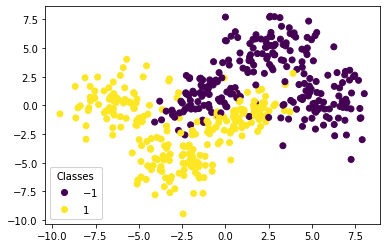

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
colors = {'1':'tab:red', '-1':'tab:blue'}
scatter = ax.scatter(x_train[:, 0],  x_train[:, 1],c=np.array(y_train))

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)


plt.show()

Use the train_AdaBoost function to train an AdaBoost model with k=5.

In [ ]:

classifiers,alphas=train_AdaBoost(x_train,y_train, 5)


Use the predict_AdaBoost function to make predictions on X_test.

In [ ]:
prediction=predict_AdaBoost(X_test,classifiers, alphas)


Use the plot_AdaBoost function to plot the learnt decision surface.

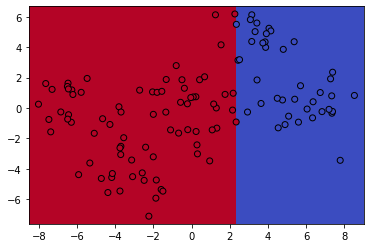

In [ ]:
plot_AdaBoost(X_test, prediction, classifiers, alphas)

Compute the accuracy of the predictions on the test set.

In [ ]:
print("Accuracy:\n",AccuracyScore(prediction,y_test)*100)


Accuracy:
 80.50847457627118


Use the train_AdaBoost function to train an AdaBoost model with k=100.

In [ ]:

classifiers,alphas=train_AdaBoost(x_train,y_train,100)

Use the predict_AdaBoost function to make predictions on X_test.

In [ ]:
prediction=predict_AdaBoost(X_test,classifiers, alphas)

Use the plot_AdaBoost function to plot the learnt decision surface.

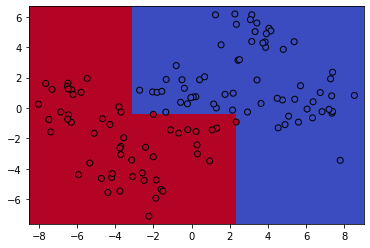

In [ ]:
plot_AdaBoost(X_test, prediction, classifiers, alphas)

Compute the accuracy of the predictions on the test set.

In [ ]:
print("Accuracy:\n",AccuracyScore(prediction,y_test)*100)

Accuracy:
 92.37288135593221
